In [13]:

import random
import requests as req

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from citipy import citipy

import openweathermapy as owm


import datetime
now = datetime.datetime.now()

In [14]:

# Create a settings object with your API key and preferred units# Creat 
api_key = "bd5334bcd8f6438b0b15e4c22ea967e2"

settings = {"units": "imperial", "appid": api_key}

In [15]:
# Latitude ranges from -90 to 90 and Longitude ranges from -180 to 180
lat = list(np.arange(-90,90.01,0.01))
long = list(np.arange(-180,180.01,0.01))

# Setting Latitude and Longitude to ramdomly pick co-ordinates.
lat_samples=random.sample(lat,1500)
long_samples=random.sample(long,1500)

# Creating a dataframe from the randomly sample Latitude and Longitude
cities_df=pd.DataFrame({"Latitude":lat_samples,"Longitude":long_samples})

#Creating new columns City and Country for storing the details corresponding to the co-ordinates
cities_df["City"]=""
cities_df["Country"]=""

# Finding the city and the country code corresponding to the Latitude and Longitude
for index,row in cities_df.iterrows():
    city=citipy.nearest_city(row["Latitude"], row["Longitude"])
    cities_df.set_value(index, "City", city.city_name)
    cities_df.set_value(index, "Country", city.country_code)

# Dropping the Latitude and Longitude as they are values of the nearest city and not the exact co-ordinates of the city
cities_df=cities_df.drop(cities_df.columns[[0, 1]], axis=1)

# Deleting duplicate values from the list of cities and keeping only the first
cities_df=cities_df.drop_duplicates(['City'], keep='first')

# Randomly sampling a list of 500 cities 
cities_df=cities_df.sample(n=5)

# Resetting the index of the cities list
cities_df=cities_df.reset_index(drop=True)

cities_df()

C:\Users\Anish Tendolkar\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Anish Tendolkar\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


TypeError: 'DataFrame' object is not callable

In [ ]:

# Get data for each city in cities_df# Get d 
weather_data = []

url="https://api.openweathermap.org/data/2.5/weather?appid=" + api_key + "&units=imperial&q="

print("\nStats Data Minning\n-----------------------------")
#Get the response from OpenWeatherMapY and storing the response into weather_data if response is found
for index,row in cities_df.iterrows():  
    print("\nProcessing record %s|%s,%s"%((index+1),row["City"],row["Country"]))
    print("\n"+url+"%s,%s"%(row["City"].replace(" ","+"),row["Country"]))
    try:
        response = owm.get_current("%s,%s"%(row["City"],row["Country"]), **settings)
        # Appending the response to the weather_Data
        weather_data.append(response)
    except:
        print(" Skipping...")


In [ ]:

summary = ["name","sys.country","dt","coord.lat", "coord.lon","main.temp_max","main.humidity","wind.speed","clouds.all"]


data = [response(*summary) for response in weather_data]
column_names = ["City","Country","Date","Latitude", "Longitude","Temperature","Humidity","Wind speed","Cloudliness"]
weather_data = pd.DataFrame(data, columns=column_names)

weather_data()


In [16]:

def plotprops(xlabelname,ylabelname,xlimits):
    plt.xlabel(xlabelname)
    plt.ylabel(ylabelname)
    plt.xlim(xlimits)
    plt.title("%s vs %s (%s/%s/%s)"%(xlabelname,ylabelname,now.month,now.day,now.year),fontsize=14)
    plt.grid(True)

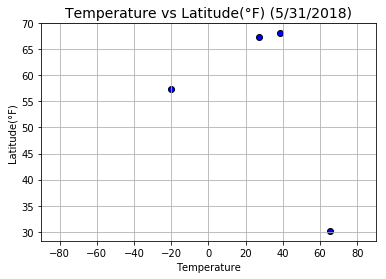

In [17]:

plt.scatter(x=weather_data["Latitude"],y=weather_data["Temperature"],facecolors="blue",edgecolors="black")
plotprops("Temperature","Latitude(°F)",[-90,90])

plt.show()

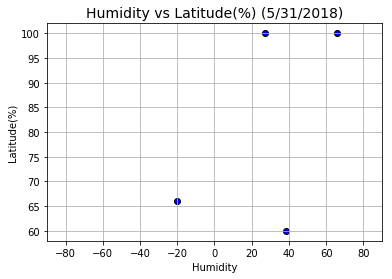

In [18]:
# Humidity vs Latitude

plt.scatter(x=weather_data["Latitude"],y=weather_data["Humidity"],facecolors="blue",edgecolors="black")
plotprops("Humidity","Latitude(%)",[-90,90])

plt.show()

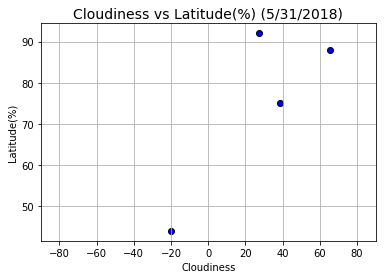

In [19]:
# Cloudiness vs Latitude

plt.scatter(x=weather_data["Latitude"],y=weather_data["Cloudliness"],facecolors="blue",edgecolors="black")
plotprops("Cloudiness","Latitude(%)",[-90,90])

plt.show()

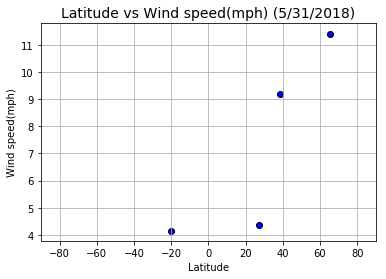

In [20]:

# Wind Speed vs Latitude  

plt.scatter(x=weather_data["Latitude"],y=weather_data["Wind speed"],facecolors="blue",edgecolors="black")
plotprops("Latitude","Wind speed(mph)",[-90,90])

plt.show()